In [2]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('HSG Historical Data.csv')
df1=df.reset_index()['Price']
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
# 4. Chia train test
train_size = int(0.9 * len(df1))
test_size = int(0.1 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# 8. Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

IndexError: tuple index out of range

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)
# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)
# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs(y_pred - ytest)/np.abs(y_pred))
print('Testing MAPE:', test_mape)

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Testing RMSE: 0.21246089142644065
Testing MAE: 0.159593575000763
Testing MAPE: 0.025296950169007154


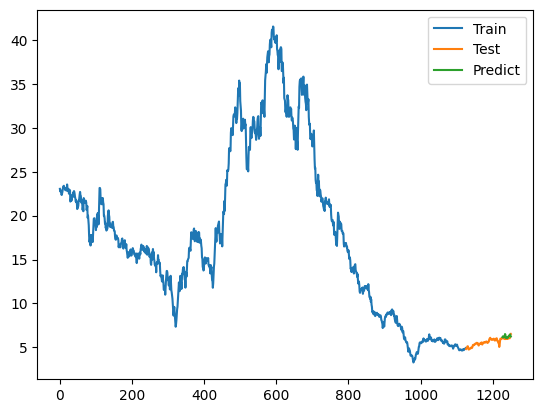

In [ ]:
# 14.Vẽ hình
# Train
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
# Test
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
# Dự đoán trên tập test
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
plt.legend(['Train','Test','Predict'])
plt.show()

# Dự đoán 30 ngày tiếp theo

In [ ]:

# 13. Predict the next 30 days
x_input = test_data[-100:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

[0.08895004]
101
1 day input [0.05541035 0.05567172 0.05567172 0.05854679 0.05802405 0.05776268
 0.05828542 0.05541035 0.05201255 0.05044433 0.05279665 0.05488761
 0.05541035 0.05697857 0.05567172 0.05619446 0.05880815 0.05959226
 0.0541035  0.05331939 0.05593309 0.05723994 0.05959226 0.060115
 0.05985363 0.05906952 0.05959226 0.05906952 0.06168322 0.06089911
 0.06089911 0.06246733 0.06037637 0.05828542 0.05828542 0.06089911
 0.06168322 0.06168322 0.06769472 0.07030842 0.07239937 0.07344485
 0.07083116 0.06821746 0.06900157 0.06821746 0.06769472 0.06795609
 0.06743335 0.06900157 0.07030842 0.07083116 0.06900157 0.06717198
 0.06508102 0.06743335 0.06795609 0.06795609 0.07187663 0.07187663
 0.06508102 0.06429692 0.06508102 0.05959226 0.05959226 0.05541035
 0.04626242 0.05227392 0.06246733 0.07083116 0.07004705 0.06952431
 0.07135389 0.07161526 0.07344485 0.07292211 0.07344485 0.07109252
 0.07161526 0.07553581 0.07736539 0.07266074 0.06952431 0.07030842
 0.0747517  0.07187663 0.07109252 0

1 day output [[0.09113925]]
2 day input [0.05567172 0.05567172 0.05854679 0.05802405 0.05776268 0.05828542
 0.05541035 0.05201255 0.05044433 0.05279665 0.05488761 0.05541035
 0.05697857 0.05567172 0.05619446 0.05880815 0.05959226 0.0541035
 0.05331939 0.05593309 0.05723994 0.05959226 0.060115   0.05985363
 0.05906952 0.05959226 0.05906952 0.06168322 0.06089911 0.06089911
 0.06246733 0.06037637 0.05828542 0.05828542 0.06089911 0.06168322
 0.06168322 0.06769472 0.07030842 0.07239937 0.07344485 0.07083116
 0.06821746 0.06900157 0.06821746 0.06769472 0.06795609 0.06743335
 0.06900157 0.07030842 0.07083116 0.06900157 0.06717198 0.06508102
 0.06743335 0.06795609 0.06795609 0.07187663 0.07187663 0.06508102
 0.06429692 0.06508102 0.05959226 0.05959226 0.05541035 0.04626242
 0.05227392 0.06246733 0.07083116 0.07004705 0.06952431 0.07135389
 0.07161526 0.07344485 0.07292211 0.07344485 0.07109252 0.07161526
 0.07553581 0.07736539 0.07266074 0.06952431 0.07030842 0.0747517
 0.07187663 0.07109252 0

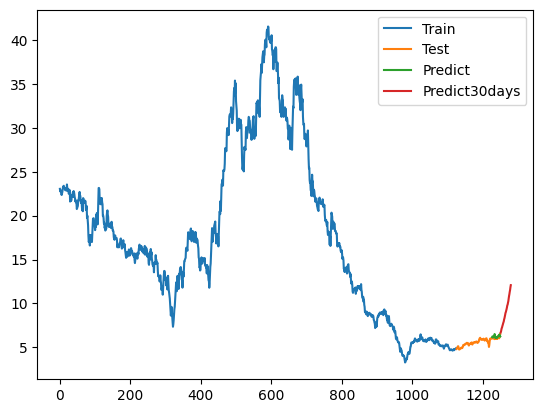

In [ ]:

# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

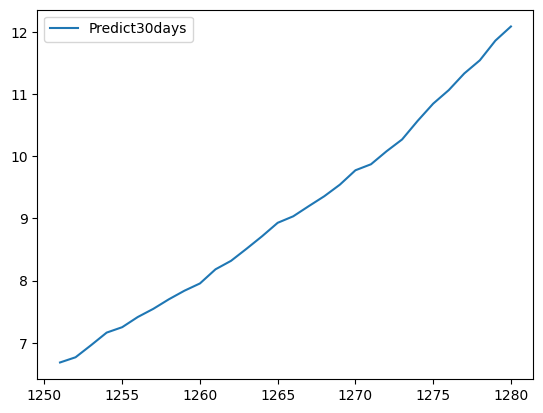

In [ ]:
# 14.Vẽ hình
# Dự đoán 30 ngày tiếp theo
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Predict30days'])
plt.show()

In [ ]:
print(scaler.inverse_transform(lst_output))

[[ 6.68322845]
 [ 6.76698769]
 [ 6.9617199 ]
 [ 7.16343949]
 [ 7.25063169]
 [ 7.41387969]
 [ 7.54539803]
 [ 7.69888616]
 [ 7.83651874]
 [ 7.95379039]
 [ 8.18078532]
 [ 8.31729448]
 [ 8.51202413]
 [ 8.71311573]
 [ 8.92845573]
 [ 9.03290542]
 [ 9.19650318]
 [ 9.35613691]
 [ 9.54179369]
 [ 9.77271788]
 [ 9.86935182]
 [10.07826487]
 [10.26803278]
 [10.56660836]
 [10.84384612]
 [11.06066615]
 [11.32909843]
 [11.54018991]
 [11.8564175 ]
 [12.08405951]]
